In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 

In [2]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> 一阶方程组</font>

在时间序列分析中，我们通过将差分方程写成线性系统来研究它们。例如，

$$
3y_{t+3} - 2y_{t+2} + 4y_{t+1} - y_t = 0
$$

我们定义

$$
\mathbf{x}_t = 
\left[
\begin{matrix}
y_t\\
y_{t+1}\\
y_{t+2}
\end{matrix}
\right], \qquad
\mathbf{x}_{t+1} = 
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
y_{t+3}
\end{matrix}
\right]
$$

重新排列差分方程以获得更好的视觉形状。

$$
y_{t+3} = \frac{2}{3}y_{t+2} - \frac{4}{3}y_{t+1} + \frac{1}{3}y_{t}
$$

这个差分方程可以重写为

$$
\mathbf{x}_{t+1} = A \mathbf{x}_{t}
$$

也就是说

$$
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
y_{t+3}
\end{matrix}
\right] = 
\left[
\begin{matrix}
0 & 1 & 0\\
0 & 0 & 1\\
\frac{1}{3} & -\frac{4}{3} & \frac{2}{3}
\end{matrix}
\right]
\left[
\begin{matrix}
y_t\\
y_{t+1}\\
y_{t+2}
\end{matrix}
\right]
$$

一般来说，我们确保差分方程看起来像：

$$
y_{t+k} = a_1y_{t+k-1} + a_2y_{t+k-2} + ... + a_ky_{t}
$$

然后重写为 $\mathbf{x}_{t+1} = A \mathbf{x}_{t}$，其中

$$
\mathbf{x}_t = 
\left[
\begin{matrix}
y_{t}\\
y_{t+1}\\
\vdots\\
y_{t+k-1}
\end{matrix}
\right], \quad
\mathbf{x}_{t+1} = 
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
\vdots\\
y_{t+k}
\end{matrix}
\right]
$$

并且

$$A=\left[\begin{array}{ccccc}
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & & 0 \\
\vdots & & & \ddots & \vdots \\
0 & 0 & 0 & & 1 \\
a_{k} & a_{k-1} & a_{k-2} & \cdots & a_{1}
\end{array}\right]$$

# <font face="gotham" color="purple"> 马尔可夫链</font>

马尔可夫链是一种随机过程，通常由差分方程建模，我们将通过一个示例来浅尝此主题。

马尔可夫链也可以用一阶差分方程$\mathbf{x}_{t+1} = P\mathbf{x}_t$描述，其中$\mathbf{x}_t$称为<font face="gotham" color="red">状态向量</font>，$A$称为<font face="gotham" color="red">随机矩阵</font>。

假设有3个城市$A$、$B$和$C$，城市间人口迁移的比例构成了下面的随机矩阵

$$
M = 
\left[
\begin{matrix}
.89 & .07 & .10\\
.07 & .90 & .11\\
.04 & .03 & .79
\end{matrix}
\right]
$$

例如，第一列表示$89\%$的人口将留在城市$A$，$7\%$将迁往城市$B$，$4\%$将迁往城市$C$。第一行表示$7\%$的城市$B$的人口将迁入城市$A$，$10\%$的城市$C$的人口将迁入城市$A$。

假设3个城市的初始人口分别为$(593000, 230000, 709000)$，将条目转换为总人口的百分比。

In [3]:
x = np.array([593000, 230000, 709000])
x = x/np.sum(x);x

array([0.38707572, 0.15013055, 0.46279373])

输入随机矩阵

In [5]:
M = np.array([[.89, .07, .1], [.07, .9, .11], [.04, .03, .79]])

在第一个周期之后，城市间的人口比例是

In [6]:
x1 = M@x
x1

array([0.4012859 , 0.2131201 , 0.38559399])

第二个周期

In [7]:
x2 = M@x1
x2

array([0.41062226, 0.26231345, 0.3270643 ])

第三个周期

In [8]:
x3 = M@x2
x3

array([0.41652218, 0.30080273, 0.28267509])

我们可以构建一个循环直到$\mathbf{x}_{100} = M\mathbf{x}_{99}$，然后绘制动态路径。 注意在20个周期后曲线趋于平缓，我们称之为<font face="gotham" color="red">收敛到稳态</font>。}

In [9]:
k = 100
X = np.zeros((k, 3))
X[0] = M@x
i = 0

while i+1 < 100:
    X[i+1] = M@X[i]
    i = i + 1

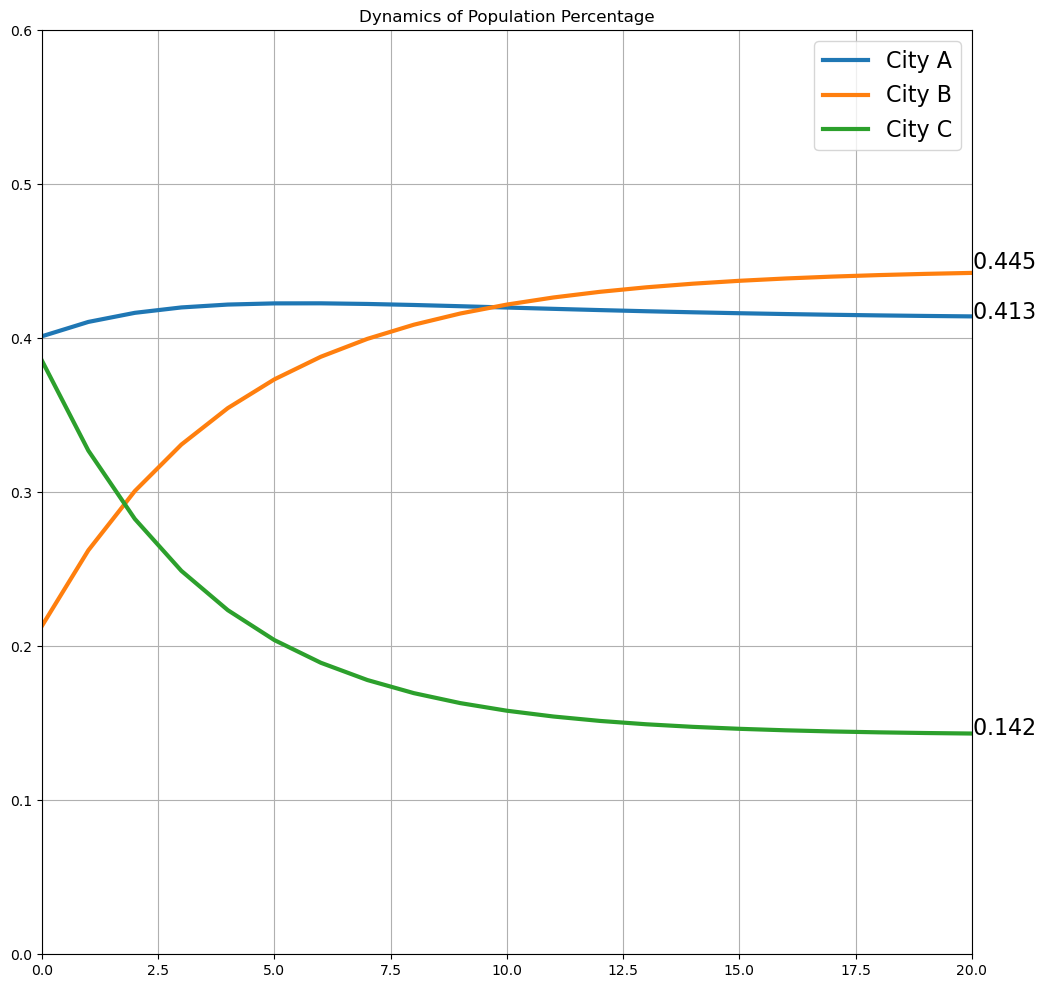

In [11]:
fig, ax = plt.subplots(figsize = (12, 12))

la = ['City A', 'City B', 'City C']
s = '$%.3f$'
for i in [0, 1, 2]:
    ax.plot(X[:, i], lw = 3, label = la[i] )
    ax.text(x = 20, y = X[-1,i], s = s %X[-1,i], size = 16)

ax.axis([0, 20, 0, .6]) # 不需要显示更多$x$，它在大约20个周期后达到稳态。
ax.legend(fontsize = 16)
ax.grid()
ax.set_title('Dynamics of Population Percentage')
plt.show()

# <font face="gotham" color="purple"> 马尔可夫链中的特征值和特征向量</font>

如果上一个例子中的$M$可对角化，那么将存在$n$个线性无关的特征向量和对应的特征值$\lambda_1$，$\ldots$，$\lambda_n$。而且特征值总是可以安排为$\left|\lambda_{1}\right| \geq\left|\lambda_{2}\right| \geq \cdots \geq\left|\lambda_{n}\right|$。

另外，因为任意初始向量$\mathbb{x}_0 \in \mathbb{R}^n$，我们可以使用特征空间（特征向量）的基来表示所有$\mathbf{x}$。

$$
\mathbf{x}_{0}=c_{1} \mathbf{v}_{1}+\cdots+c_{n} \mathbf{v}_{n}
$$

这被称为$\mathbf{x}_0$的<font face="gotham" color="red">特征向量分解</font>。乘以$A$

$$
\begin{aligned}
\mathbf{x}_{1}=A \mathbf{x}_{0} &=c_{1} A \mathbf{v}_{1}+\cdots+c_{n} A \mathbf{v}_{n} \\
&=c_{1} \lambda_{1} \mathbf{v}_{1}+\cdots+c_{n} \lambda_{n} \mathbf{v}_{n}
\end{aligned}
$$

一般来说，我们有一个$\mathbf{x}_k$的公式

$$
\mathbf{x}_{k}=c_{1}\left(\lambda_{1}\right)^{k} \mathbf{v}_{1}+\cdots+c_{n}\left(\lambda_{n}\right)^{k} \mathbf{v}_{n}
$$

现在我们测试一下$M$是否有$n$个线性无关的特征向量。

In [12]:
M = sy.Matrix([[.89, .07, .1], [.07, .9, .11], [.04, .03, .79]]);M

⎡0.89  0.07  0.1 ⎤
⎢                ⎥
⎢0.07  0.9   0.11⎥
⎢                ⎥
⎣0.04  0.03  0.79⎦

In [13]:
M.is_diagonalizable()

True

$M$可对角化，这也意味着$M$有$n$个线性无关的特征向量。

In [14]:
P, D = M.diagonalize()
P = round_expr(P,4); P # user-defined round function at the top of the notebook

⎡-0.6618  -0.6536  -0.413 ⎤
⎢                         ⎥
⎢-0.7141  0.7547   -0.4769⎥
⎢                         ⎥
⎣-0.2281  -0.1011   0.89  ⎦

In [15]:
D = round_expr(D,4); D

⎡1.0    0       0   ⎤
⎢                   ⎥
⎢ 0   0.8246    0   ⎥
⎢                   ⎥
⎣ 0     0     0.7554⎦

首先我们找到$\big[\mathbf{x}_0\big]_C$，即$c_1, c_2, c_3$

In [16]:
x0 = sy.Matrix([[.3870], [.1501], [0.4627]]);x0

⎡0.387 ⎤
⎢      ⎥
⎢0.1501⎥
⎢      ⎥
⎣0.4627⎦

In [17]:
P_aug = P.row_join(x0)
P_aug_rref = round_expr(P_aug.rref()[0],4); P_aug_rref

⎡1  0  0  -0.6233⎤
⎢                ⎥
⎢0  1  0  -0.1759⎥
⎢                ⎥
⎣0  0  1  0.3402 ⎦

In [18]:
c = sy.zeros(3, 1)
for i in [0, 1, 2]:
    c[i] = P_aug_rref[i, 3]
c = round_expr(c,4);c 

⎡-0.6233⎤
⎢       ⎥
⎢-0.1759⎥
⎢       ⎥
⎣0.3402 ⎦

现在我们可以使用公式计算$\mathbf{x}_{100}$，结果与我们在图中绘制的相同。

In [19]:
x100 = c[0] * D[0, 0]**100 * P[:, 0]\
+ c[1] * D[1, 1]**100 * P[:, 1]\
+ c[2] * D[2, 2]**100 * P[:, 2]
x100 = round_expr(x100,4);x100 

⎡0.4125⎤
⎢      ⎥
⎢0.4451⎥
⎢      ⎥
⎣0.1422⎦

这已经足够接近稳态了。

# <font face="gotham" color="purple"> 分形图</font>

这是分形几何的一个例子，展示了动态系统和仿射变换如何创建分形图片。

该算法执行四种类型的仿射变换。相应的概率是$p_1, p_2, p_3, p_4$。

$$
\begin{array}{l}
T_{1}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{rr}
0.86 & 0.03 \\
-0.03 & 0.86
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
1.5
\end{array}\right], p_{1}=0.83 \\
T_{2}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{lr}
0.2 & -0.25 \\
0.21 & 0.23
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
1.5
\end{array}\right], p_{2}=0.09 \\
T_{3}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{rr}
-0.15 & 0.27 \\
0.25 & 0.26
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
0.45
\end{array}\right], p_{3}=0.07 \\
T_{4}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{ll}
0 & 0 \\
0 & 0.17
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
0
\end{array}\right], p_{4}=0.01
\end{array}
$$

下面的代码是不言自明的。

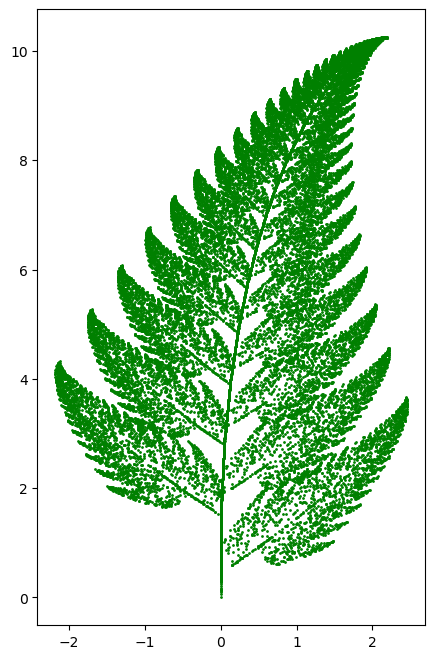

In [20]:
A = np.array([[[.86, .03],
              [-.03, .86]],
             [[.2, -.25],
              [.21, .23]],
             [[-.15, .27],
              [.25, .26]],
             [[0., 0.],
              [0., .17]]])
a = np.array([[[0,1.5]],
             [[0,1.5]],
             [[0,0.45]],
             [[0,0]]])

p1 = 1*np.ones(83)
p2 = 2*np.ones(9)
p3 = 3*np.ones(7)
p4 = 4*np.ones(1)
p = np.hstack((p1,p2,p3,p4))

k = 30000
fig, ax = plt.subplots(figsize = (5,8))
X = np.zeros((2,k))
for i in range(k-1):
    n = np.random.randint(0, 100)
    if p[n] == 1:
        X[:,i+1] = A[0,:,:]@X[:,i]+a[0,:,:]
    elif p[n] == 2:
        X[:,i+1]  = A[1,:,:]@X[:,i]+a[1,:,:]
    elif p[n] == 3:
        X[:,i+1]  = A[2,:,:]@X[:,i]+a[2,:,:]
    else:
        X[:,i+1]  = A[3,:,:]@X[:,i]+a[3,:,:]
ax.scatter(X[0,:],X[1,:], s = 1, color = 'g')
plt.show()